# Operations Research and Management MGT1060
Prof. Balaji J  

---


# Railway Operations Optimization
* Yasir Ahmad (22MIA1064)
* Naveen N (22MIA1049)  
---

## Background Case Study:


**PERT (Program Evaluation and Review Technique)** and **CPM (Critical Path Method)** are crucial for managing railway projects, such as track construction and maintenance.

#### PERT in Railways
- **Risk Management**: Analyzes risks and uncertainties in project timelines using optimistic, most likely, and pessimistic time estimates.
- **Time Estimates**: Provides a probabilistic approach to scheduling, essential for handling uncertainties in large-scale railway projects.

#### CPM in Railways
- **Critical Path Identification**: Identifies the sequence of tasks that determine the shortest project duration, ensuring timely completion.
- **Resource Optimization**: Helps allocate resources efficiently, prioritizing critical tasks to avoid delays and cost overruns.

By leveraging PERT and CPM, railway project managers can enhance planning, execution, and completion of projects, ensuring reliability and safety in railway operations.


---



# Digital Assignment 2

# 1. PERT Analysis for Risk Management in Railway Expansion
A railway company is expanding its network to include new routes and needs to analyze the risks associated with the project timeline. The project consists of several activities with varying time estimates.

#### Objective
Perform a PERT analysis to determine the probability of completing the project within a specified time frame.

**Activities and Time Estimates:**

| Activity | Predecessors | Optimistic Time (days) | Most Likely Time (days) | Pessimistic Time (days) |
|----------|---------------|------------------------|-------------------------|-------------------------|
| A        | -             | 4                      | 6                       | 8                       |
| B        | A             | 5                      | 7                       | 9                       |
| C        | A             | 3                      | 5                       | 7                       |
| D        | B, C          | 2                      | 4                       | 6                       |
| E        | D             | 1                      | 3                       | 5                       |

**Question:**
1. Calculate the expected time and variance for each activity.
2. Determine the probability of completing the project within 35 days using the standard deviation and Z-score.  

Activity A: Expected Time = 6.00 days, Variance = 0.44
Activity B: Expected Time = 7.00 days, Variance = 0.44
Activity C: Expected Time = 5.00 days, Variance = 0.44
Activity D: Expected Time = 4.00 days, Variance = 0.44
Activity E: Expected Time = 3.00 days, Variance = 0.44


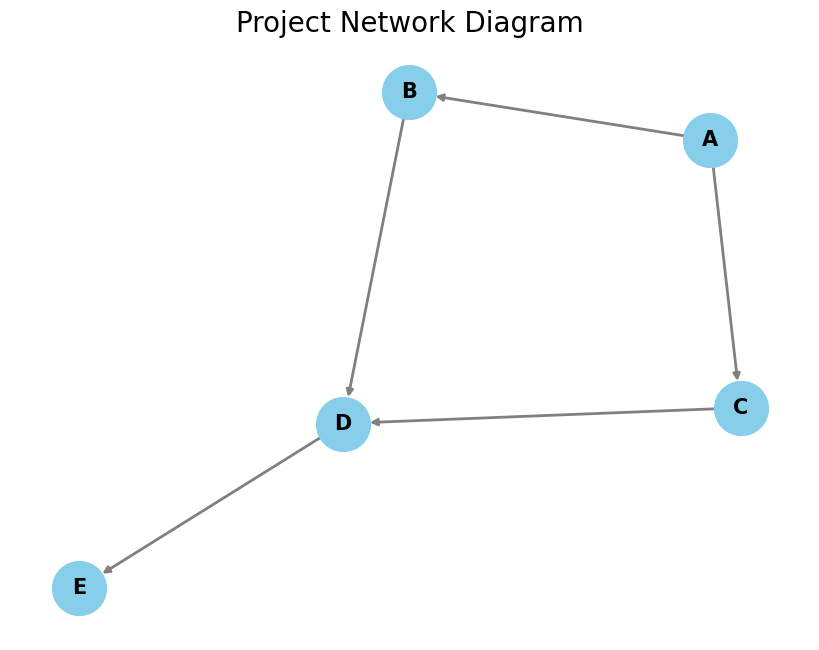


Expected Project Completion Time: 37.00 days

Project Standard Deviation: 3.46 days


In [ ]:
import numpy as np
from scipy.stats import norm

# Define the activities and their time estimates
activities = {
    'A': {'optimistic': 4, 'most_likely': 6, 'pessimistic': 8},
    'B': {'optimistic': 5, 'most_likely': 7, 'pessimistic': 9},
    'C': {'optimistic': 3, 'most_likely': 5, 'pessimistic': 7},
    'D': {'optimistic': 2, 'most_likely': 4, 'pessimistic': 6},
    'E': {'optimistic': 1, 'most_likely': 3, 'pessimistic': 5}
}

# Calculate the expected time and variance for each activity
for activity, times in activities.items():
    expected_time = (times['optimistic'] + 4 * times['most_likely'] + times['pessimistic']) / 6
    variance = ((times['pessimistic'] - times['optimistic']) / 6) ** 2
    activities[activity]['expected_time'] = expected_time
    activities[activity]['variance'] = variance
    print(f"Activity {activity}: Expected Time = {expected_time:.2f} days, Variance = {variance:.2f}")

# Define the project network
network = {
    'A': [],
    'B': ['A'],
    'C': ['A'],
    'D': ['B', 'C'],
    'E': ['D']
}
graph = nx.DiGraph()

# Add nodes and edges to the graph
for activity, predecessors in network.items():
    graph.add_node(activity)
    for predecessor in predecessors:
        graph.add_edge(predecessor, activity)

# Visualize the project network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)  # Use a layout algorithm for better visualization
nx.draw(graph, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=15, font_weight="bold", width=2, edge_color="gray")
plt.title("Project Network Diagram", fontsize=20)
plt.show()

# Calculate the expected project completion time and variance
def calculate_project_completion_time_and_variance(network, activities):
    completion_times = {activity: 0 for activity in network}
    variances = {activity: 0 for activity in network}
    for activity in network:
        if network[activity]:
            completion_times[activity] = max(completion_times[predecessor] + activities[predecessor]['expected_time'] for predecessor in network[activity])
            variances[activity] = sum(variances[predecessor] + activities[predecessor]['variance'] for predecessor in network[activity])
        completion_times[activity] += activities[activity]['expected_time']
        variances[activity] += activities[activity]['variance']
    return max(completion_times.values()), sum(variances.values())

project_completion_time, project_variance = calculate_project_completion_time_and_variance(network, activities)
project_std_dev = np.sqrt(project_variance)


print(f"\nExpected Project Completion Time: {project_completion_time:.2f} days")
print(f"\nProject Standard Deviation: {project_std_dev:.2f} days")



Probability of completing the project within 35 days: 28.19%




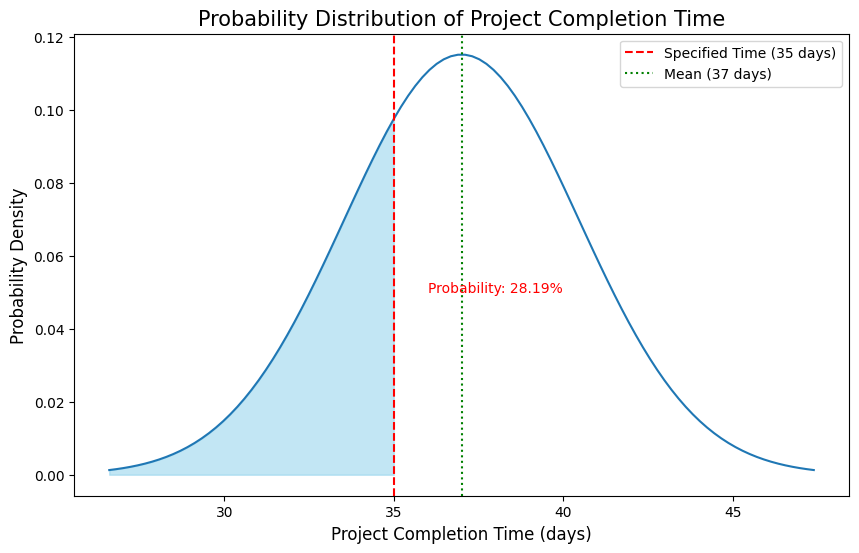

In [ ]:
# Calculate the probability of completing the project within a specified time frame
specified_time = 35
z_score = (specified_time - project_completion_time) / project_std_dev
probability = norm.cdf(z_score)
print(f"\nProbability of completing the project within {specified_time} days: {probability:.2%}\n\n")

# Visualization of results (Probability Distribution)

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# ... (Your existing code to calculate project_completion_time and project_std_dev)

# Generate x-values for the probability distribution plot
x = np.linspace(project_completion_time - 3 * project_std_dev, project_completion_time + 3 * project_std_dev, 100)

# Calculate the corresponding y-values (probability density function)
y = norm.pdf(x, loc=project_completion_time, scale=project_std_dev)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y)

# Shade the area representing the probability of completing the project within 35 days
x_fill = np.linspace(project_completion_time - 3 * project_std_dev, 35, 100)
y_fill = norm.pdf(x_fill, loc=project_completion_time, scale=project_std_dev)
plt.fill_between(x_fill, y_fill, color='skyblue', alpha=0.5)

# Add labels and title
plt.xlabel('Project Completion Time (days)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Probability Distribution of Project Completion Time', fontsize=15)

# Add vertical line for specified time
plt.axvline(x=35, color='red', linestyle='--', label=f'Specified Time (35 days)')
plt.axvline(x=37, color='green', linestyle=':', label='Mean (37 days)')

# Add text annotation for the calculated probability
plt.text(36, 0.05, f'Probability: {probability:.2%}', color='red') # Adjust position as needed
plt.legend()


plt.show()

# 2. Critical Path Method (CPM) for Railway Track Maintenance
A railway company needs to perform maintenance on a section of the railway track. The project consists of several tasks, each with a specified duration. The project manager needs to identify the critical path to ensure timely completion.

#### Objective
Identify the critical path and calculate the total project duration using CPM.

**Tasks and Durations:**

| Task | Predecessors | Duration (days) |
|------|--------------|-----------------|
| A    | -            | 5               |
| B    | A            | 3               |
| C    | A            | 4               |
| D    | B            | 2               |
| E    | C            | 6               |
| F    | D, E         | 3               |

**Question:**
1. Draw the project network diagram.
2. Identify the critical path and calculate the total project duration.

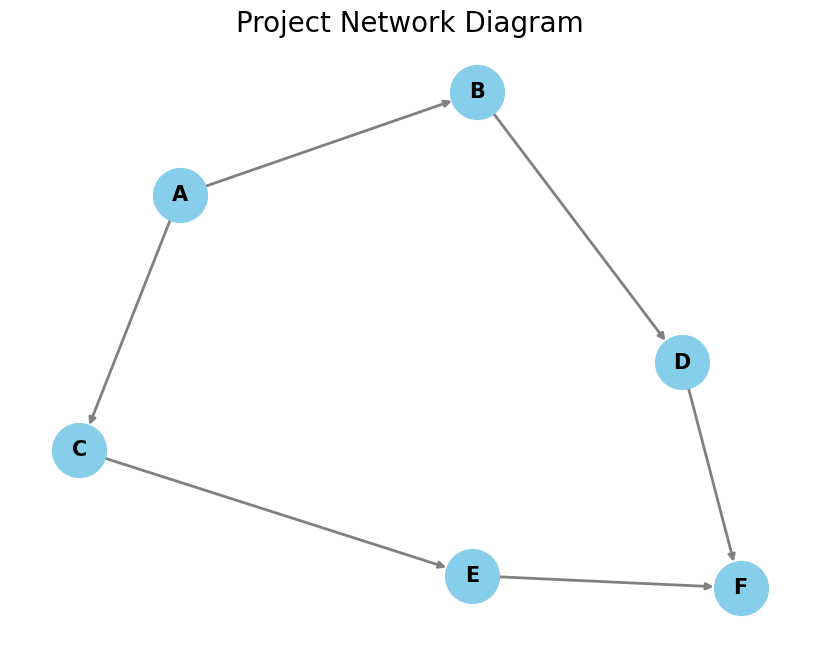

Critical Path: A -> B -> D -> F
Total Project Duration: 3 days


In [ ]:
import networkx as nx

# Define the tasks and their durations
tasks = {
    'A': 5,
    'B': 3,
    'C': 4,
    'D': 2,
    'E': 6,
    'F': 3
}

# Define the project network
network = {
    'A': [],
    'B': ['A'],
    'C': ['A'],
    'D': ['B'],
    'E': ['C'],
    'F': ['D', 'E']
}

# Create a directed graph
G = nx.DiGraph()
graph = nx.DiGraph()

# Add nodes and edges to the graph
for activity, predecessors in network.items():
    graph.add_node(activity)
    for predecessor in predecessors:
        graph.add_edge(predecessor, activity)

# Visualize the project network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)  # Use a layout algorithm for better visualization
nx.draw(graph, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=15, font_weight="bold", width=2, edge_color="gray")
plt.title("Project Network Diagram", fontsize=20)
plt.show()

# Add nodes and edges with durations
for task, duration in tasks.items():
    G.add_node(task, duration=duration)
for task, predecessors in network.items():
    for predecessor in predecessors:
        G.add_edge(predecessor, task)

# Calculate the critical path
critical_path = nx.dag_longest_path(G, weight='duration')
critical_path_duration = nx.dag_longest_path_length(G, weight='duration')

print(f"\nCritical Path: {' -> '.join(critical_path)}")
print(f"\nTotal Project Duration: {critical_path_duration} days")